Missing Values Before Handling:
Patient_ID        0
Age               0
Gender           21
BloodPressure    30
Cholesterol      20
Diabetes          0
Heart_Disease     0
dtype: int64
Total Duplicates: 5


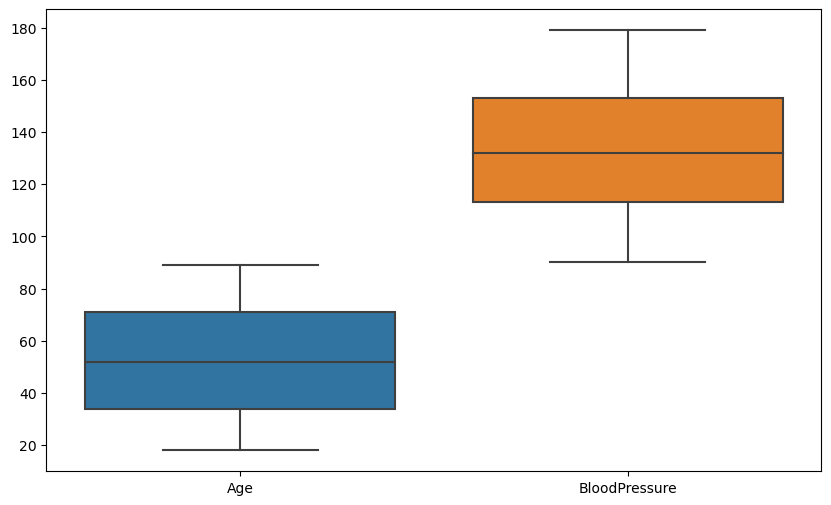

Missing Values After Handling:
Patient_ID        0
Age               0
Gender            0
BloodPressure     0
Cholesterol      20
Diabetes          0
Heart_Disease     0
dtype: int64
Total Duplicates After Cleaning: 0
Data Types:
Patient_ID         int64
Age              float64
Gender             int64
BloodPressure    float64
Cholesterol      float64
Diabetes          object
Heart_Disease     object
dtype: object
Cleaned dataset saved successfully!


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset
file_path = "Day_16_Healthcare_Data.csv"
df = pd.read_csv(file_path)

# Rename columns to standardize naming
df.rename(columns={'Blood_Pressure': 'BloodPressure'}, inplace=True)

# Handle Missing Data
print("Missing Values Before Handling:")
print(df.isnull().sum())

df.fillna({
    'Age': df['Age'].median(),
    'Gender': df['Gender'].mode()[0],
    'BloodPressure': df['BloodPressure'].median()
}, inplace=True)

# Detect and Handle Duplicates
duplicates = df.duplicated()
print(f"Total Duplicates: {duplicates.sum()}")
df = df.drop_duplicates()

# Detect and Handle Outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Age', 'BloodPressure']])
plt.show()

# Capping outliers
for col in ['Age', 'BloodPressure']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.clip(df[col], lower_bound, upper_bound)

# Standardize and Normalize Data
# Convert categorical variables to numerical
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Scale numerical data
scaler = MinMaxScaler()
df[['Age', 'BloodPressure']] = scaler.fit_transform(df[['Age', 'BloodPressure']])

# Data Validation
print("Missing Values After Handling:")
print(df.isnull().sum())
print("Total Duplicates After Cleaning:", df.duplicated().sum())
print("Data Types:")
print(df.dtypes)

# Final Data Export
df.to_csv("cleaned_healthcare_data.csv", index=False)
print("Cleaned dataset saved successfully!")
